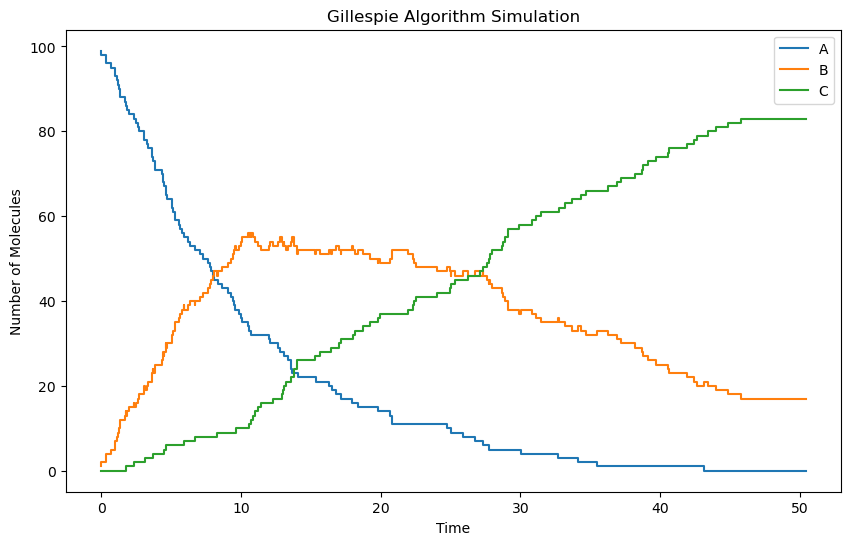

In [1]:
### chat gpt example:

# This example simulates a basic chemical reaction system with two reactions: A -> B and B -> C.

import numpy as np
import matplotlib.pyplot as plt

def gillespie_algorithm(initial_state, reaction_rates, max_time):
    time_points = [0]
    state_trajectory = [initial_state.copy()]

    while time_points[-1] < max_time:
        current_state = state_trajectory[-1]
        propensities = np.array(reaction_rates(current_state))

        total_propensity = propensities.sum()

        # Generate random numbers for time until next reaction and reaction selection
        next_reaction_time = np.random.exponential(1 / total_propensity)
        reaction_choice = np.random.choice(len(propensities), p=propensities / total_propensity)

        # Update time and state
        time_points.append(time_points[-1] + next_reaction_time)
        current_state[reaction_choice] -= 1
        current_state[reaction_choice + 1] += 1

        state_trajectory.append(current_state.copy())

    return time_points, np.array(state_trajectory)

def reaction_rates(state):
    # Define reaction rates based on the current state
    rate1 = 0.1 * state[0]  # A -> B
    rate2 = 0.05 * state[1]  # B -> C

    return [rate1, rate2]

# Initial state: 100 A molecules, 0 B molecules, 0 C molecules
initial_state = np.array([100, 0, 0])

# Simulation parameters
max_simulation_time = 50

# Run Gillespie algorithm
time, state_trajectory = gillespie_algorithm(initial_state, reaction_rates, max_simulation_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.step(time, state_trajectory[:, 0], label='A')
plt.step(time, state_trajectory[:, 1], label='B')
plt.step(time, state_trajectory[:, 2], label='C')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.legend()
plt.title('Gillespie Algorithm Simulation')
plt.show()

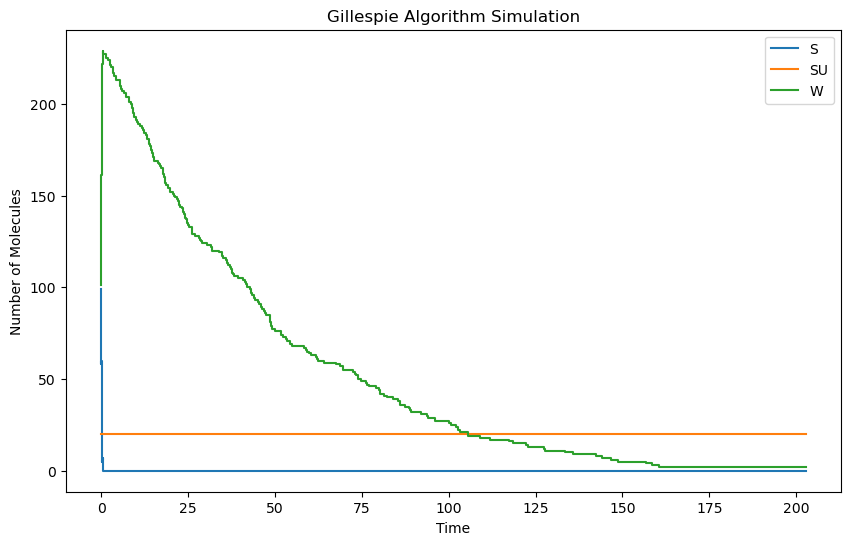

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def reaction_rates(state):
    # Define reaction rates based on the current state
    k1 = 0.1
    k2 = 0.05
    k3 = 0.02
    #constant_SU = 10  # Assuming SU concentration is constant

    rate1 = k1 * state[0] * state[1]  # S + SU -> 2S
    rate2 = k2 * state[0] * state[2]  # S + W -> 2W
    rate3 = k3 * state[2]  # W -> Dead

    return [rate1, rate2, rate3]

# Initial state: 100 S molecules, 1 SU molecule, 0 W molecules, 0 Dead molecules
initial_state = np.array([100, 20, 100, 0])
# Simulation parameters
max_simulation_time = 200



def gillespie_algorithm(initial_state, reaction_rates, max_time):
    time = [0] # time points array
    states_trajectory = [initial_state.copy()] # state trajectory array

    while time[-1] < max_time:
        state = states_trajectory[-1] 
        a = np.array(reaction_rates(state)) #  propensity vector

        a_sum = a.sum() # sum over all propensities 

        # Generate random numbers for time until next reaction and reaction selection
        
        tau=1/a_sum*np.log(1/np.random.rand()) # time untill next reaction
        j = np.random.choice(len(a), p=a / a_sum) # choose which reaction j occurs
                                                  # most likely the reaction with the highest a / a_sum
        if j == 0:
            state[0] +=1 # outcome of reaction 1
        elif j == 1:
            state[2]+=1 # outcome of reaction 2
            state[0]-=1
        elif j == 2:
            state[2]-=1 # outcome of reaction 3
            state[3]+=1
            
        # Update time and state
        time.append(time[-1] + tau)

        states_trajectory.append(state.copy())

    return time, np.array(states_trajectory)



# Run Gillespie algorithm
time_points, states_trajectory = gillespie_algorithm(initial_state, reaction_rates, max_simulation_time)

# Plot the results
plt.figure(figsize=(10, 6))
plt.step(time_points, states_trajectory[:, 0], label='S')
plt.step(time_points, states_trajectory[:, 1], label='SU')
plt.step(time_points, states_trajectory[:, 2], label='W')
#plt.step(time_points, states_trajectory[:, 3], label='D')
plt.xlabel('Time')
plt.ylabel('Number of Molecules')
plt.legend()
plt.title('Gillespie Algorithm Simulation')
plt.show()